# Table of Contents
* [Introduction](#introduction)
* [Load data](#data)
* [Model training](#model)
* [SHAP tornado plot](#shap)

# Introduction <a class="anchor" id="introduction"></a>

Visualization tool to show the impact of each feature on an individual model's prediction using SHAP values.

# Imports <a class="anchor" id="imports"></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import shap

from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data <a class="anchor" id="data"></a>

In [62]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(dataset_url, sep=';')

X = df.drop(columns='quality')
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Model training <a class="anchor" id="model"></a>

In [63]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# SHAP tornado plot <a class="anchor" id="shap"></a>

In [77]:
def shap_tornado(model, X_test, sample_index, class_index):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test.iloc[sample_index, :])
    features_list = X_test.columns.tolist()

    # I use a dataframe cause it's easier to work with
    dict_ = {
        'x': features_list,
        'y': shap_values[class_index]
    }
    df = pd.DataFrame(dict_)
    df = df.reindex(df.y.abs().sort_values().index)
      
    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 6)
    
    x = df.x.values
    y = df.y.values
    y_pos = np.arange(len(shap_values[5]))

    # Get a color map for coloring
    my_cmap = cm.get_cmap('bwr')
    # Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
    my_norm = Normalize(vmin=-0.015, vmax=0.015)

    ax.barh(y_pos, y[::-1], align='center', color=my_cmap(my_norm(y[::-1])))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(x[::-1])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('SHAP value')

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('bottom')
    
    plt.show()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


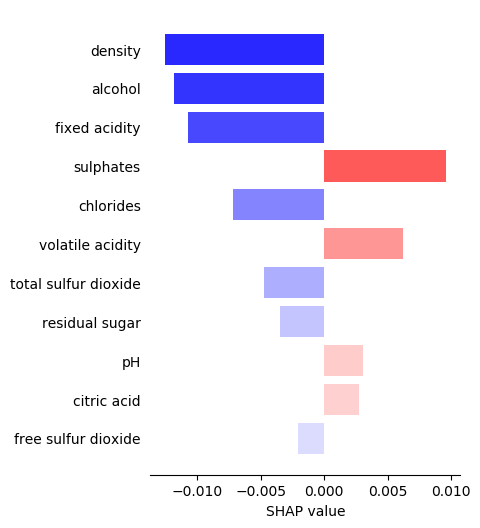

In [78]:
shap_tornado(model, X_test, sample_index=14, class_index=1)